In [86]:
import matplotlib.pyplot as plt 
import numpy as np
import random

In [87]:
#找中心點
def findcenter(h,no):
    newx=[sum(h[0][x])/len(h[0][x]) for x in range(0,no)]
    newy=[sum(h[1][y])/len(h[1][y]) for y in range(0,no)]
    for u in range(0,no):
        plt.scatter(newx[u],newy[u],marker="+",color='black')
    return newx,newy

In [88]:
#一開始未塗色的散佈圖
def opening(no):
    with open('cdata.csv','r') as c:
        x=[]
        y=[]
        c.readline()
        for h in c.readlines():
            h=h.strip()
            p=h.split(',')
            x.append(float(p[0]))
            y.append(float(p[1]))
    plt.scatter(x,y)
    r=random.sample(range(len(x)), no)#找到五個起始點
    c=['red','blue','green','purple','cyan','gray','pink','chocolate','lightgreen','brown']
    #將原來5個起始點塗上五種不一樣的顏色
    for h in range(0,no):
        plt.scatter(x[r[h]],y[r[h]],c=c[h])    
    return x,y,r

In [89]:
#第一次分群狀況
def firstdata(no,x,y,r):
    a=[[],[]]
    for k in range(0,no):
        a[0].append([])
        a[1].append([])
    for n in range(0,len(x)):
        if n in r:
            continue
        else:
            distance=[(x[s]-x[n])**2+(y[s]-y[n])**2 for s in r]
            m=distance.index(min(distance))
            c=['red','blue','green','purple','cyan','gray','pink','chocolate','lightgreen','brown']
            plt.scatter(x[n],y[n],c=c[m])
            a[0][m].append(x[n])
            a[1][m].append(y[n])
    return a,m

In [90]:
#不斷修改的分群
def newdata(no,x,y,n,f,m):
    number=0
    while True:
        b=[[],[]]
        for k in range(0,no):
            b[0].append([])
            b[1].append([])
        for h in range(0,len(x)):
            d=[(n[t]-x[h])**2+(f[t]-y[h])**2 for t in range(0,no)]
            if m==d.index(min(d)):
                number=number+1
            m=d.index(min(d))
            c=['red','blue','green','purple','cyan','gray','pink','chocolate','lightgreen','brown']
            plt.scatter(x[h],y[h],c=c[m])
            b[0][m].append(x[h])
            b[1][m].append(y[h])
        n,f=findcenter(b,no)
        if number>295:
            break
    plt.show()
    return n,f,b

In [91]:
#k-means的主架構
def ks(no):
    x,y,r=opening(no)
    a,m=firstdata(no,x,y,r)
    n,f=findcenter(a,no)
    n,f,b=newdata(no,x,y,n,f,m)
    return n,f,b

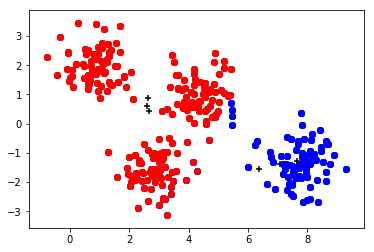

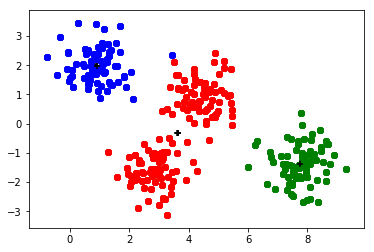

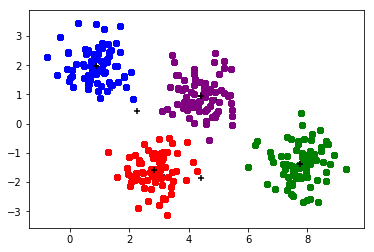

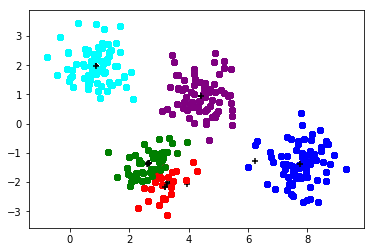

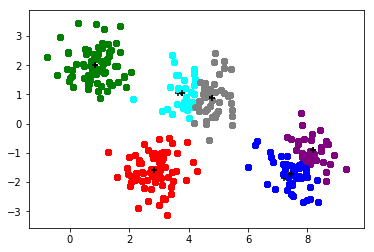

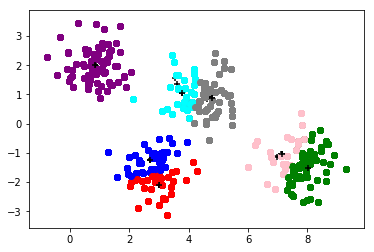

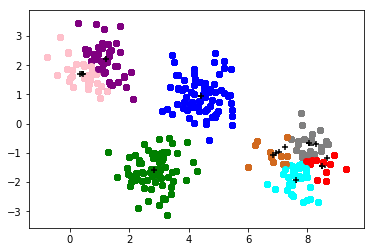

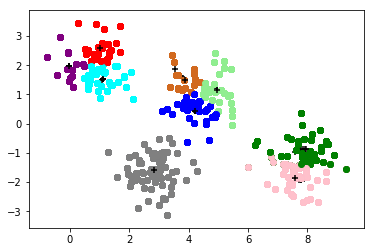

<function matplotlib.pyplot.legend(*args, **kwargs)>

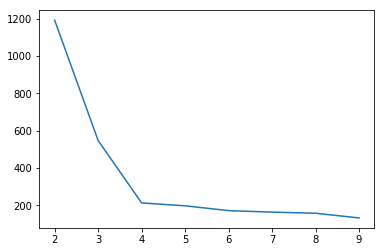

In [93]:
sseb=[]
number=[2,3,4,5,6,7,8,9]
def data():
    for q in range(2,10):
        total=0
        a,b,c=ks(q)
        for k in range(0,q):
            sse=[(a[k]-c[0][k][s])**2+(b[k]-c[1][k][s])**2 for s in range(0,len(c[0][k]))]
            total=total+sum(sse)
        sseb.append(total)
    return sseb
sseb=data()
plt.plot(number,sseb)